In [2]:
'''
Gwendolyn Stephenson, 10/20/23
Program for conducting the double slit experiment. 
'''

# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy

#Wave function class --
class waveFunction():
  #initial parameters for the wavefunction class --
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d #Distance between slits
    self.distance_to_screen = distance_to_screen #Distance between the slits and the screen
    self.measure_slit= measure_slit #Boolean to represent wether the slits are being observed or not

    #If measure_slit is false, then there is an array of values, norm = normalization factor of a wave function,
    #The normalization factor is used to ensure that the total probability of the wave function is equal to 1. It 
    #is calculated using numerical integration (trapezoidal rule) over the unnormalized wave function.
    #probs = probabilities associatedwith each value in 'values'
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    #If measure_slit is True, then values will be set to [-d/2, d/2], normalization = 1, and probabilities [0.5, 0.5]
    #the probs in this case are [0.5, 0.5], and normalization = 1
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]

  #Evaluation --
  def evaluate(self,x):
    #if measure_slit is false it will compute a wave_function(x) using a cosine function.
    #wave function(x)= (cos^2((pi*d*x)/distance_to_screen)/normalization factor
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    
    #If measure_slit is true, then  it returns specific probabilities for two slit positions [-d/2, d/2]
    #probs are [0.5, 0,5]
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  
  #Measurement --
  def measure(self):

    #Randomly selects a value from values based on the probabilities in probs.
    #If measure_slit is true, it adds some random noise to the selected value using a normal distribution. If measure_slit is false, it adds uniform noise.
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  
  #Unnormalized Evaluation --
  #returns the unnormalized wave function without dividing by the normalization factor
  #Unnormalized_waveFunction(x) = cos^2((pi*d*x)/distance_to_screen)
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

#---------------------------------------------------------------------------------------------------------

#Double slit Class
class doubleSlit():

  #Initialization of the class 
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist #distance between slits
    self.distance_to_screen = distance_to_screen #distance between the slits and the screen
    self.detections_x = [] #List to store x-coordinates of electron detections
    self.detections_y = [] #List to store y-coordinates of electron detections
    self.screen_width = screen_width #Width of the screen
    self.screen_height = screen_height #height of the screen
    self.measure_slit = measure_slit #Boolean indicating whether the slits are being observed or not
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit) #An instance of the waveFunction() class with parameters from the initialization

  #Firing an electron
  def fire_electron(self):

    #Raises a ValueError if the slit_dist or distance_to_screen attributes have been modified since the last screen clearing.

    #if the slit_dist from doubleSlit() is not equal to d (slit_dist) from waveFunction() then it raises a valueError.
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    #if distance_to_screen from class doubleSlit() is not equal to distance_to_screen from class waveFunction() then is raises a valueError.
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    
    #calculates the x-coordinate of the detected electron on the screen based on the measurement from the wave function.
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())

    #Appends the x-coordinate and a randomly generated y-coordinate to the detection lists
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))

  #plots a 2d histogram using plt.hist2d, the x-coordinates are along the x-axis and the y-coordinates are along the y-axis
  #The screens width and height parameters control the number of bins in the historgram and the 'range" parameter sets the axis limits
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()

  #plots a histogram of electron detections using plt.hist the x-coordinates are binned and the numver of electrons detected in
  #each bin is represented on the y-axis, the screen_width parameter controls the number of bins in the histogram. 
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()

#Clear Screen (clear_screen method):
#Resets the detections_x and detections_y lists.
#Creates a new instance of the waveFunction class to reset the wave function.
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)

#Electron Beam (electron_beam method):
#Raises a ValueError if the slit_dist or distance_to_screen attributes have been modified since the last screen clearing.
#Calls the fire_electron method in a loop for a specified number of electrons (num_electrons).
#Essentially, it simulates firing a beam of electrons and detecting their positions on the screen.
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()

#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

'''
The core mathematical expressions are within the waveFunction class, particularly in the wave function evaluation (evaluate and evaluate_unnormalized) methods.
normalization factor ( norm )--> is calculated using numerical integration (trapezoidal rule) over the unnormalized wave function.
evalue --> wave_function(x)= (cos^2((pi*d*x)/distance_to_screen)/(normalization factor)
evaluate_unnormalized --> Unnormalized_waveFunction(x) = cos^2((pi*d*x)/distance_to_screen)

The x-coordinate of the detected electrons is calculated based on the measured value from the wave function using the tangent function: 
-->                                    detected_x = distance_to_screen * tan(measured_value).

The overall class simulates a double-slit experiment, where electrons are fired through two slits and their positions are detected on a screen. 
The simulation includes the quantum nature of particles and incorporates randomness in the measurement process. The visualizations provided by the 
show_screen and show_hist methods help analyze the distribution of detected electrons on the screen.
'''

'\nThe core mathematical expressions are within the waveFunction class, particularly in the wave function evaluation (evaluate and evaluate_unnormalized) methods.\nnormalization factor ( norm )--> is calculated using numerical integration (trapezoidal rule) over the unnormalized wave function.\nevalue --> wave_function(x)= (cos^2((pi*d*x)/distance_to_screen)/(normalization factor)\nevaluate_unnormalized --> Unnormalized_waveFunction(x) = cos^2((pi*d*x)/distance_to_screen)\n\nThe x-coordinate of the detected electrons is calculated based on the measured value from the wave function using the tangent function: \n-->                                    detected_x = distance_to_screen * tan(measured_value).\n\nThe overall class simulates a double-slit experiment, where electrons are fired through two slits and their positions are detected on a screen. \nThe simulation includes the quantum nature of particles and incorporates randomness in the measurement process. The visualizations provided

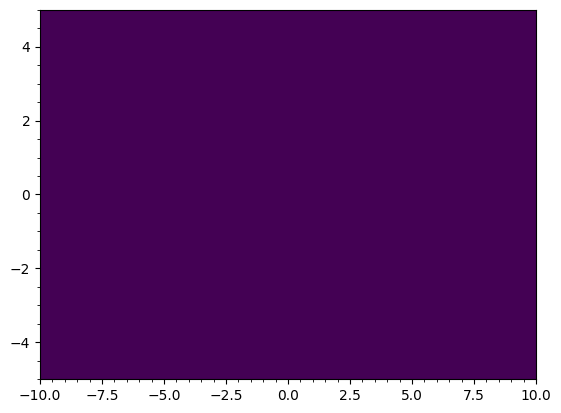

In [3]:
#creating a doubleslit object and then printing the screen

exp = doubleSlit()
exp.show_screen()

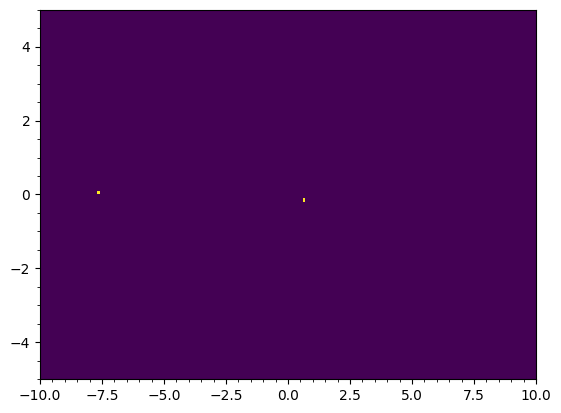

In [4]:
#made a double slit object with measure_slit set to false, and then firing two electrons at the screen and then printing the screen.

exp = doubleSlit(measure_slit=False)
exp.fire_electron()
exp.fire_electron()
exp.show_screen()

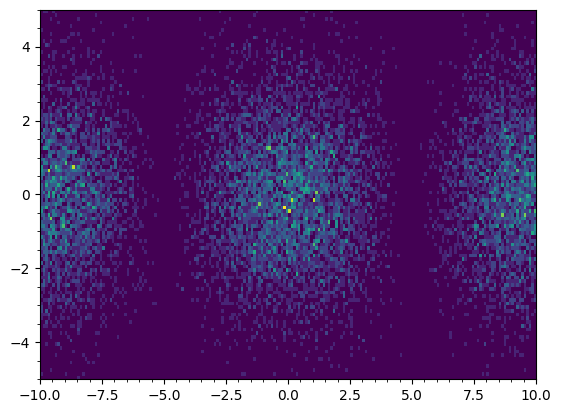

In [5]:
#while measue_slit is set to false, we shoot 12,000 electrons at the screen, showing that there is an interference pattern.
#when an electron is not being measured, it will be in a state of superposition until measured.
#so even though we shoot one electron, it'll behave as a wave thus creating the interference pattern.


exp.electron_beam(num_electrons = 12000)
exp.show_screen()

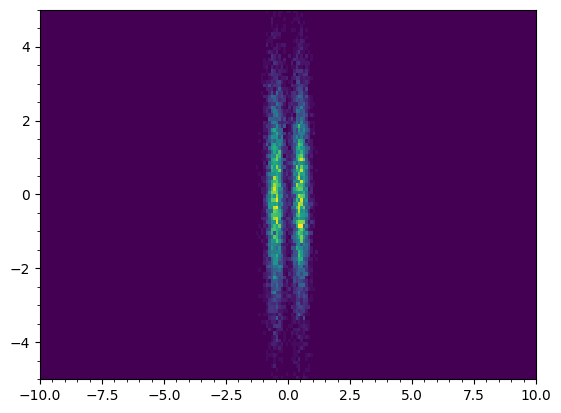

In [6]:
#creating a doubleSlit object and setting measure_slit to true, we then shoot 12,000 electrons at the screen and print the screen.
#you will notice that now there is no interference pattern. That is because when the slits are being measured or observed, it would
#collapse the superposition of the electron, thus making it a particle as opposed to a wave. 
exp = doubleSlit(measure_slit=True)

exp.electron_beam(num_electrons = 12000)
exp.show_screen()

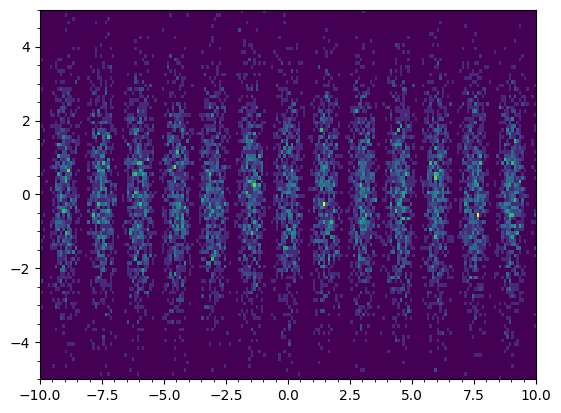

In [7]:
#creates a doubleSlit object setting the distance between the slits to 10 and the distance from the slits and the screen to 15
#we then clear the screen from the previous block of code, and then shoot 10,000 electrons to the screen, and then print the results
#you'll see here that based off the distances between slits and the screen, as well as measure_slit being False, we'll have an interference pattern
#with the bands of positive interference being relatively close to each other.

exp = doubleSlit(slit_dist = 10, distance_to_screen = 15)
exp.clear_screen()
exp.electron_beam(num_electrons=10000)
exp.show_screen()

Graph of Exp 1


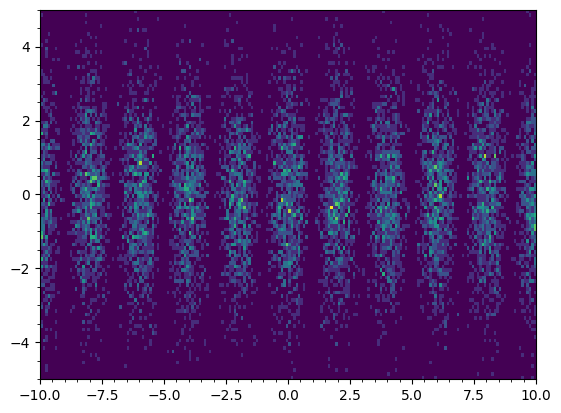



Graph of Exp 2


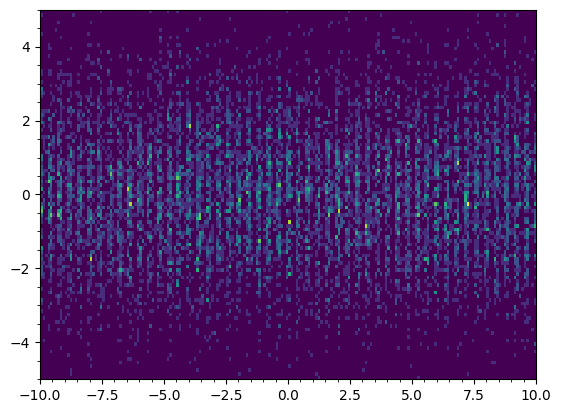



Graph of Exp 3


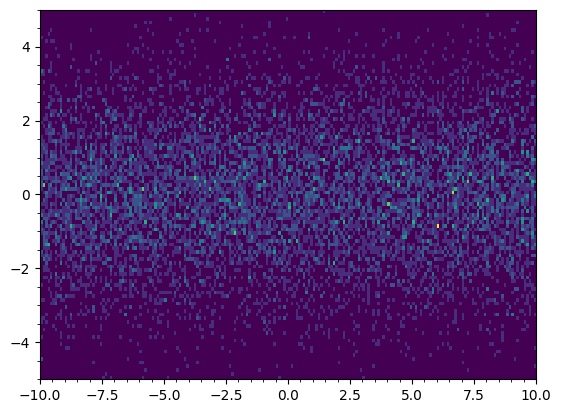

In [8]:
#There are 3 doubleSlit objects, with contrasting slit distances --> 5, 25, 50
#For slit dist 5 --> we see a prominent interference pattern
#for slit dist 25 --> there is an intereference pattern, but there's a lot of bands of positive interference, and they're really close together
#for slit dist 50 --> The interference pattern is indistinguishable, it just looks like a sploch of electrons. 

exp1 = doubleSlit(slit_dist = 5)
exp2 = doubleSlit(slit_dist = 25)
exp3 = doubleSlit(slit_dist = 50)

exp1.electron_beam(num_electrons=10000)
print("Graph of Exp 1")
exp1.show_screen()

print("\n")

exp2.electron_beam(num_electrons=10000)
print("Graph of Exp 2")
exp2.show_screen()

print("\n")

exp3.electron_beam(num_electrons=10000)
print("Graph of Exp 3")
exp3.show_screen()

Graph of Exp 1


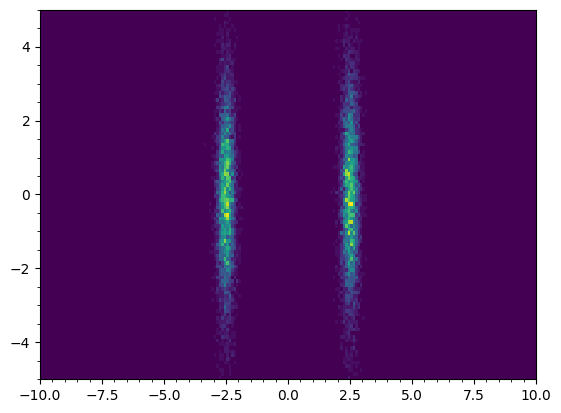



Graph of Exp 2


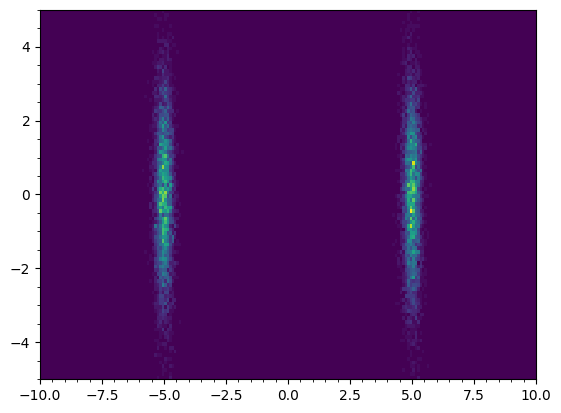



Graph of Exp 3


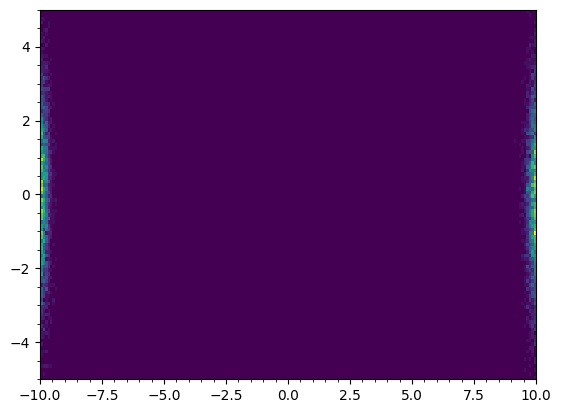

In [9]:
#this is the same as the block of code above, this time though, distances are 5, 10, 20, and measure_slit is = True
#for slit_dist = 5 --> You two bands of electrons
#for slit_dist = 10 --> there's still two bands of electrons, but further apart
#for slit_dist = 20 --> there's still two bands of electrons, but they're on the outskirts of the screen. Very far apart. 

exp1 = doubleSlit(slit_dist = 5, measure_slit = True)
exp2 = doubleSlit(slit_dist = 10, measure_slit = True)
exp3 = doubleSlit(slit_dist = 20, measure_slit = True)

exp1.electron_beam(num_electrons=10000)
print("Graph of Exp 1")
exp1.show_screen()

print("\n")

exp2.electron_beam(num_electrons=10000)
print("Graph of Exp 2")
exp2.show_screen()

print("\n")

exp3.electron_beam(num_electrons=10000)
print("Graph of Exp 3")
exp3.show_screen()

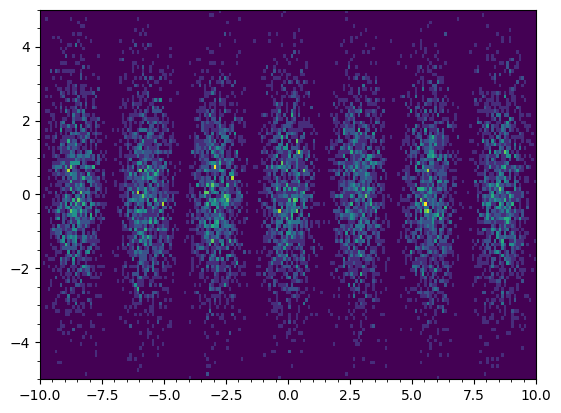



the distance between the slits is equal to 7
the distance between the slits and the screen is equal to 20


In [12]:
#making a doubleSlit object with its distance_to_screen = 20 and slit_dist = 7, and measure_slit = False
#I then shoot 10000 electrons to the screen, and then print the results.
#it prints the screen and the values for slit_dist and distance_to_screen

exp = doubleSlit(distance_to_screen = 20, slit_dist = 7, measure_slit = False)
exp.electron_beam(num_electrons=10000)
exp.show_screen()

print("\n")

var1 = exp.slit_dist
var2 = exp.distance_to_screen
str1 = f"the distance between the slits is equal to {var1}"
str2 = f"the distance between the slits and the screen is equal to {var2}"
print(str1)
print(str2)

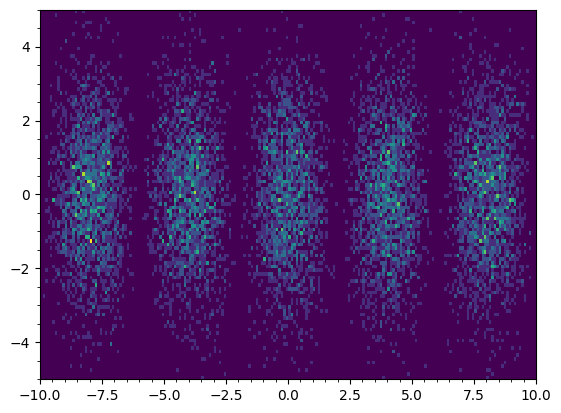


The distance between the slits is equal to 4
The distance between the slits and the screen is equal to 16


In [14]:
#making a doubleSlit object with its distance_to_screen = 16 and slit_dist = 4,
#I then shoot 10000 electrons to the screen, and then print the results.
#it prints the screen and the values for slit_dist and distance_to_screen

my_experiment = doubleSlit()
my_experiment.slit_dist = 4
my_experiment.distance_to_screen = 16
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

var1 = my_experiment.slit_dist
var2 = my_experiment.distance_to_screen
str1 = f"The distance between the slits is equal to {var1}"
str2 = f"The distance between the slits and the screen is equal to {var2}"

print("\n" + str1)
print(str2)